<a href="https://colab.research.google.com/github/kajalkumari13/Iris-Flower-Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
#Step 1: Load Dataset
iris = load_iris()

In [9]:
# Convert dataset into pandas DataFrame for better visualization
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [12]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [13]:
#Exploratory Data Analysis (EDA)
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None


In [14]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


/tmp/ipython-input-3286801860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette="Set2")


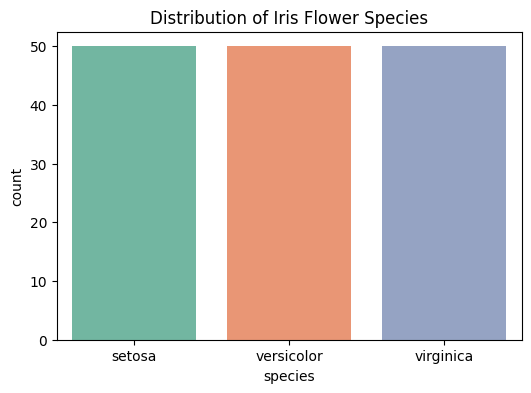

In [15]:
# Count plot of species
plt.figure(figsize=(6,4))
sns.countplot(x='species', data=df, palette="Set2")
plt.title("Distribution of Iris Flower Species")
plt.show()

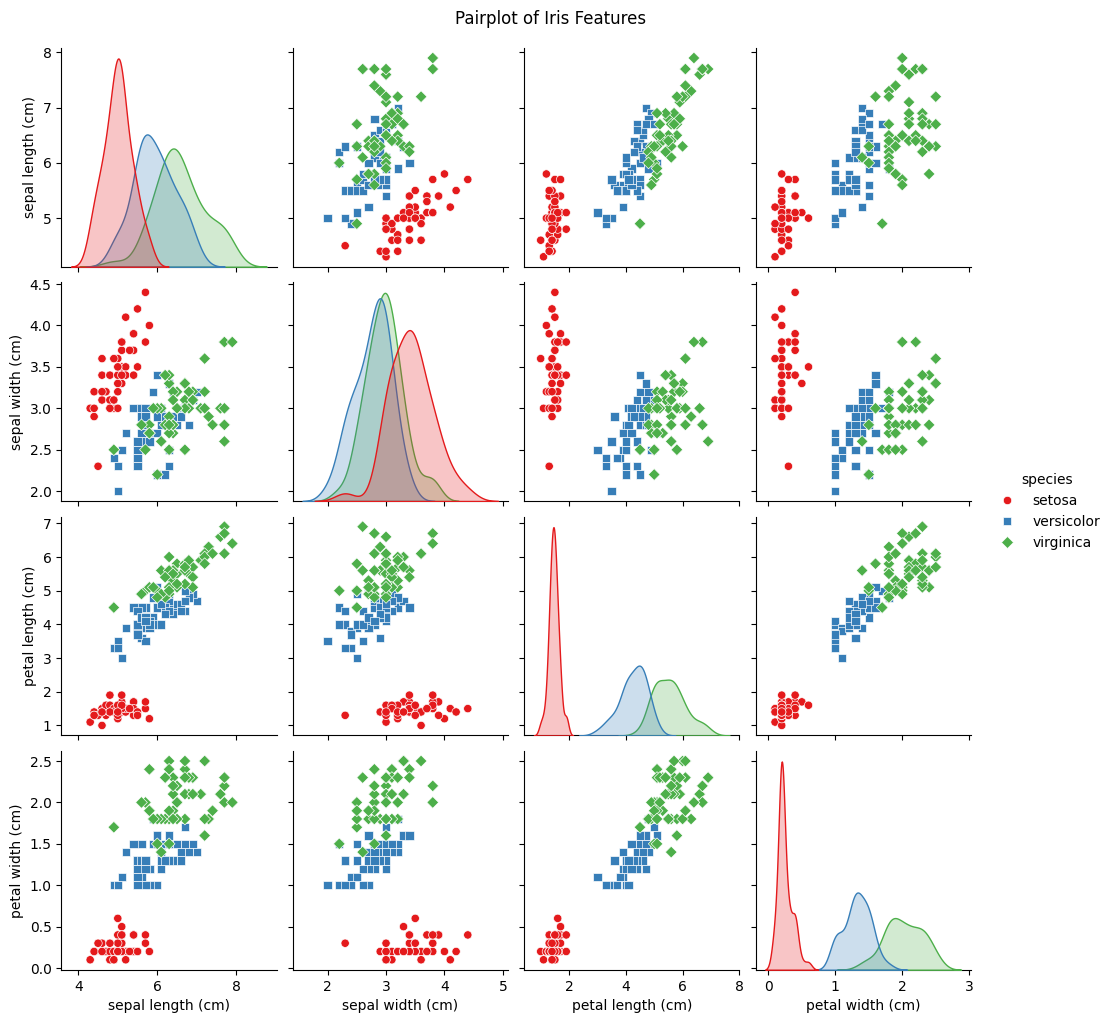

In [16]:
# Pairplot to visualize feature relationships
sns.pairplot(df, hue="species", markers=["o", "s", "D"], palette="Set1")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

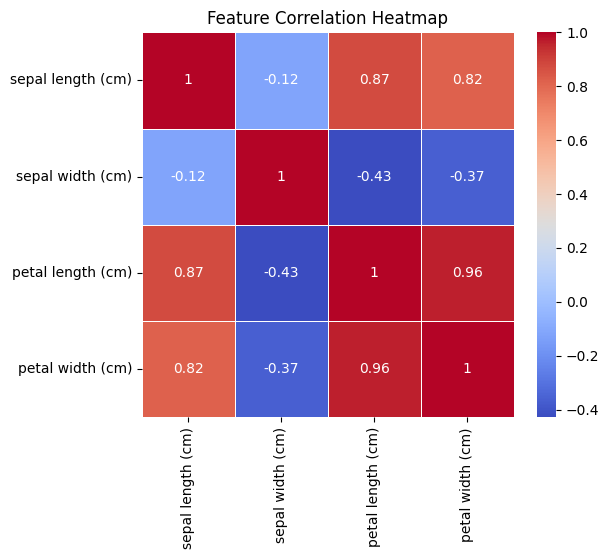

In [17]:
#Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
#Prepare Data for Training
X = iris.data
y = iris.target

In [19]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
#Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [21]:
#Model Evaluation
y_pred = clf.predict(X_test)

In [22]:
# Accuracy
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.9666666666666667


In [23]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



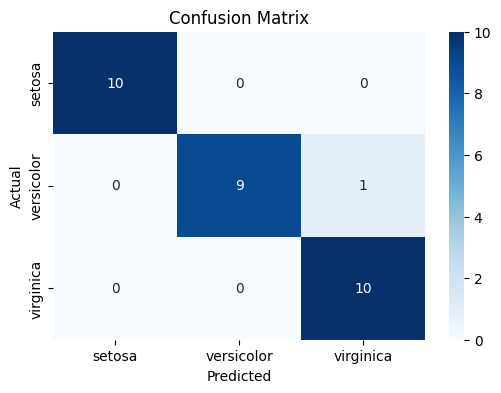

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

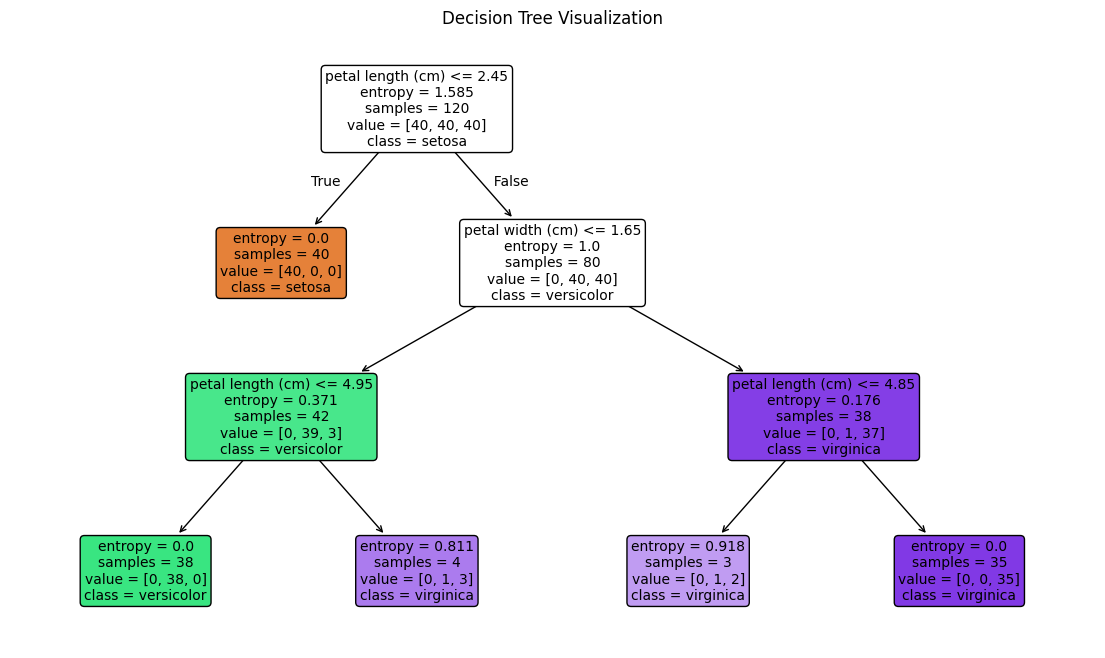

In [25]:
#Visualize the Decision Tree
plt.figure(figsize=(14,8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [26]:
#Feature Importance
importance = clf.feature_importances_
feature_names = iris.feature_names

/tmp/ipython-input-2089551025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=feature_names, palette="viridis")


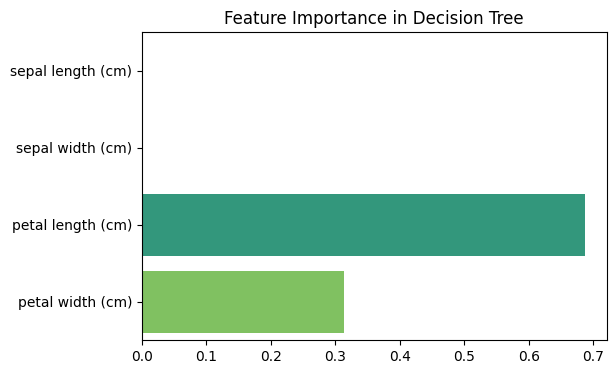

In [27]:
plt.figure(figsize=(6,4))
sns.barplot(x=importance, y=feature_names, palette="viridis")
plt.title("Feature Importance in Decision Tree")
plt.show()

In [28]:
#Prediction on New Data
new_flower = [[5.0, 3.4, 1.5, 0.2]]
prediction = clf.predict(new_flower)
predicted_species = iris.target_names[prediction][0]

print("\nPrediction for {}: {}".format(new_flower, predicted_species))


Prediction for [[5.0, 3.4, 1.5, 0.2]]: setosa
